# Example [nilearn 8.4.2](https://nilearn.github.io/auto_examples/03_connectivity/plot_signal_extraction.html#extract-signals-on-a-parcellation-defined-by-labels)

In [21]:
from nilearn import datasets

In [22]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

In [24]:
dataset.maps

'/Users/weiwei_qi/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz'

In [25]:
atlas_filename = dataset.maps

In [35]:
from nilearn import image
print(image.load_img(atlas_filename).shape)
print("fmri_filenames is a 3d file")

(91, 109, 91)
fmri_filenames is a 3d file


In [26]:
labels = dataset.labels

In [39]:
labels
len(labels)

49

In [40]:
type(labels)

list

In [41]:
type(data.confounds)

list

In [10]:
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

In [27]:
print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

Atlas ROIs are located in nifti image (4D) at: /Users/weiwei_qi/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


In [28]:
# One subject of brain development fmri data
data = datasets.fetch_development_fmri(n_subjects=1)

In [29]:
fmri_filenames = data.func[0]

In [32]:
fmri_filenames

'/Users/weiwei_qi/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

In [33]:
print(image.load_img(fmri_filenames).shape)
print("fmri_filenames is a 4d file")

(50, 59, 50, 168)
fmri_filenames is a 4d file


# 8.4.2.2. Extract signals on a parcellation defined by labels

In [11]:
from nilearn.input_data import NiftiLabelsMasker

In [12]:
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

In [20]:
masker

NiftiLabelsMasker(background_label=0, detrend=False, dtype=None, high_pass=None,
                  labels_img='/Users/weiwei_qi/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
                  low_pass=None, mask_img=None,
                  memory=Memory(location=nilearn_cache/joblib), memory_level=1,
                  resampling_target='data', smoothing_fwhm=None,
                  standardize=True, strategy='mean', t_r=None, verbose=5)

In [13]:
time_series = masker.fit_transform(fmri_filenames, confounds=data.confounds)

[NiftiLabelsMasker.fit_transform] loading data from /Users/weiwei_qi/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
[Memory]0.1s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [14]:
from nilearn.connectome import ConnectivityMeasure

In [15]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [16]:
# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation

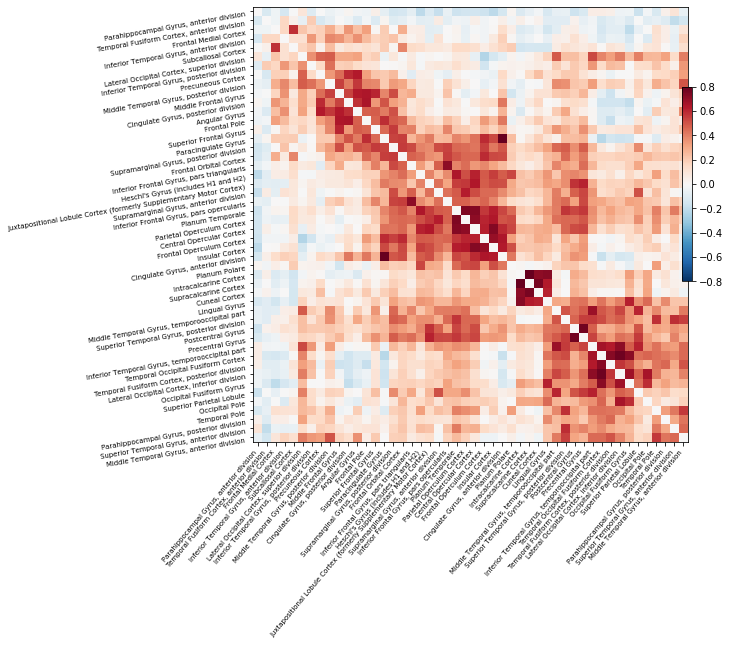

In [17]:
plot_ = plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

8.4.2.4. Same thing without confounds, to stress the importance of confounds

In [19]:
time_series = masker.fit_transform(fmri_filenames)
# Note how we did not specify confounds above. This is bad!

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

[NiftiLabelsMasker.fit_transform] loading data from /Users/weiwei_qi/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/weiwei_qi/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/Users/weiwei_qi/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Load

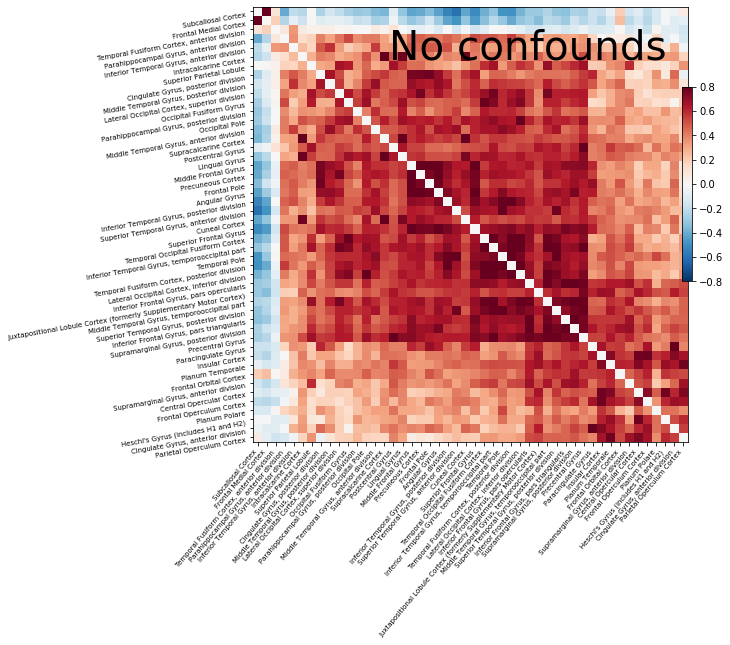

In [19]:
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title='No confounds', reorder=True)

plotting.show()